# Exploring Data

In [54]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [5]:
df=pd.read_csv(r"D:\Internships\Feynn Labs\Project 2\CaseStudy\mcdonalds.csv")

In [6]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [11]:
df.shape

(1453, 15)

In [13]:
MD_x = df.iloc[:, 0:11].values

In [14]:
MD_x = (MD_x == "Yes").astype(int)

In [15]:
col_means = np.round(np.mean(MD_x, axis=0), 2)

In [16]:
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [22]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_variance_ratio = pca.explained_variance_ratio_

In [20]:
print(explained_variance_ratio)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [23]:
pca_summary = pd.DataFrame(data=MD_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])

# Print the formatted PCA summary
pd.set_option("display.precision", 1)  # Set the precision to 1 decimal place
print(pca_summary)

      PC1      PC2      PC3      PC4      PC5      PC6      PC7      PC8  \
0     0.4 -2.2e-01  6.6e-01 -4.0e-01  2.0e-01 -3.9e-01 -2.1e-01  1.6e-01   
1    -0.2  3.9e-01 -7.3e-01 -9.5e-02  4.5e-02 -8.7e-02 -9.6e-02 -3.5e-02   
2     0.4  7.3e-01 -1.2e-01  6.9e-01  8.4e-01 -6.9e-01  5.8e-01  3.6e-01   
3    -0.2 -3.5e-01 -8.4e-01  2.1e-01 -6.8e-01 -3.6e-02 -5.4e-02 -2.3e-01   
4     0.2 -8.1e-01  2.9e-02  5.5e-01  8.5e-01 -9.7e-02 -4.6e-01  1.7e-01   
...   ...      ...      ...      ...      ...      ...      ...      ...   
1448  1.6  2.8e-01 -1.4e-02  2.0e-01 -1.5e-01  3.1e-01 -7.5e-02  3.5e-01   
1449 -1.0  1.4e-02  3.0e-01  4.4e-01 -1.3e-01  3.8e-01 -3.3e-01  8.8e-01   
1450 -0.2  1.1e+00  2.2e-01 -4.7e-01 -1.9e-01 -1.9e-01 -9.2e-02 -3.7e-02   
1451 -1.2 -3.9e-02  5.6e-01  7.0e-01  4.8e-02  1.9e-01 -2.7e-02 -3.4e-01   
1452  1.6  2.8e-01 -1.4e-02  2.0e-01 -1.5e-01  3.1e-01 -7.5e-02  3.5e-01   

          PC9     PC10     PC11  
0     1.8e-01  5.2e-01 -5.7e-01  
1     1.1e-01  4.9e

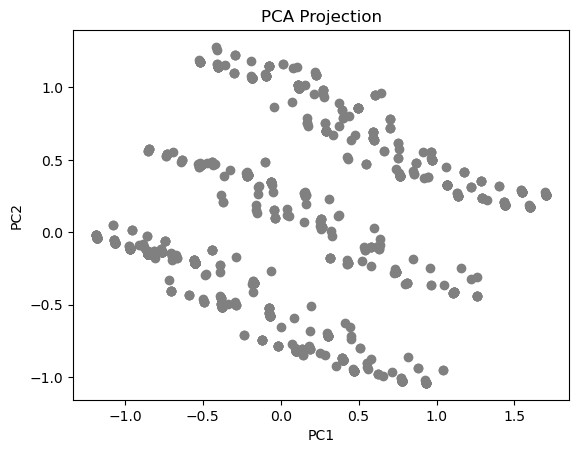

In [27]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c="grey")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

# Extracting Segments using K-means

In [29]:
np.random.seed(1234)  # Set the random seed

# MD.x is the matrix of data obtained from previous steps

# Perform K-means clustering
cluster_labels = []
k_values = range(2, 9)  # Range of k values from 2 to 8
n_rep = 10  # Number of repetitions
verbose = False

for k in k_values:
    best_score = np.inf
    best_labels = None
    
    for _ in range(n_rep):
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(MD_x)
        score = kmeans.inertia_
        
        if score < best_score:
            best_score = score
            best_labels = labels
    
    cluster_labels.append(best_labels)

# Relabel clusters
relabel_cluster_labels = []
for labels in cluster_labels:
    unique_labels = np.unique(labels)
    relabel_map = {label: i for i, label in enumerate(unique_labels)}
    relabeled_labels = [relabel_map[label] for label in labels]
    relabel_cluster_labels.append(relabeled_labels)


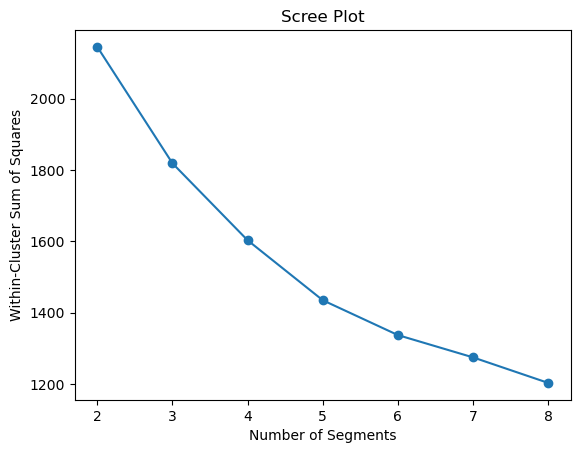

In [32]:
x_values = range(2, 9)  # Range of k values from 2 to 8

# Calculate within-cluster sum of squares (WCSS)
wcss = [KMeans(n_clusters=k).fit(MD_x).inertia_ for k in x_values]

# Create scree plot
plt.plot(x_values, wcss, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Scree Plot")
plt.show()

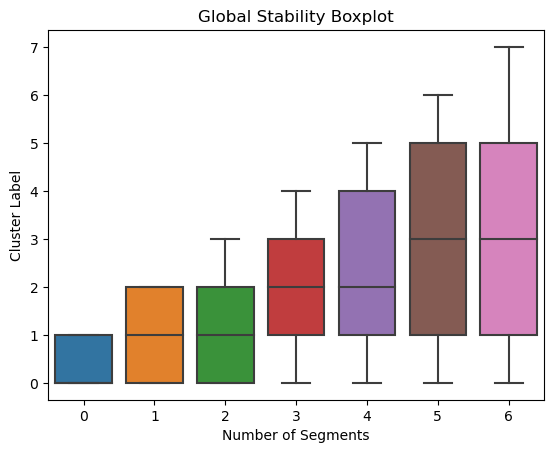

In [35]:
np.random.seed(1234)  # Set the random seed

# MD.x is the matrix of data obtained from previous steps

# Perform bootstrapped K-means clustering
cluster_labels = []
k_values = range(2, 9)  # Range of k values from 2 to 8
n_rep = 10  # Number of repetitions
n_boot = 100  # Number of bootstrap samples

for k in k_values:
    boot_labels = []
    
    for _ in range(n_boot):
        boot_data = resample(MD_x)
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(boot_data)
        boot_labels.append(labels)
    
    cluster_labels.append(boot_labels)

# Create global stability boxplot
fig, ax = plt.subplots()
ax = sns.boxplot(data=cluster_labels)
ax.set_xlabel("Number of Segments")
ax.set_ylabel("Cluster Label")
ax.set_title("Global Stability Boxplot")
plt.show()


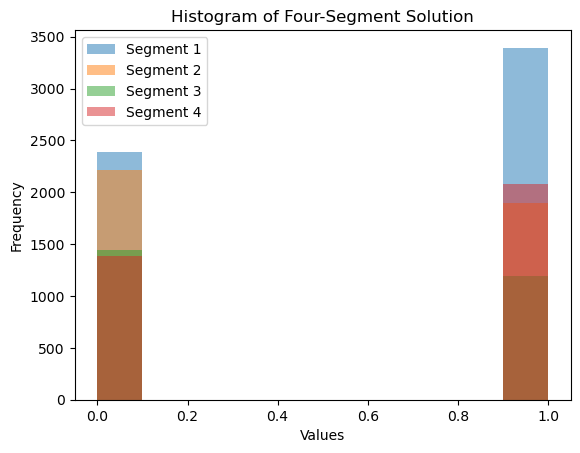

In [40]:
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=1234)
labels = kmeans.fit_predict(MD_x)

# Create histogram plot
segment_1 = MD_x[labels == 0]
segment_2 = MD_x[labels == 1]
segment_3 = MD_x[labels == 2]
segment_4 = MD_x[labels == 3]

# Set the number of bins and the range for the histogram
bins = np.linspace(0, 1, 11)

plt.hist(segment_1.flatten(), bins=bins, alpha=0.5, label="Segment 1")
plt.hist(segment_2.flatten(), bins=bins, alpha=0.5, label="Segment 2")
plt.hist(segment_3.flatten(), bins=bins, alpha=0.5, label="Segment 3")
plt.hist(segment_4.flatten(), bins=bins, alpha=0.5, label="Segment 4")

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Four-Segment Solution")
plt.legend()
plt.show()


# Extracting Segments using mixtures of distributions

In [42]:
MD_k4 = labels  # Assuming the four-segment solution labels are stored in the 'labels' variable

In [46]:
np.random.seed(1234)

# Perform model-based clustering
k_range = range(2, 9)  # Range of cluster numbers
n_rep = 10  # Number of repetitions

best_model = None
best_bic = np.inf

for k in k_range:
    bic_sum = 0
    
    for _ in range(n_rep):
        # Create a Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k)
        
        # Fit the model to the data
        gmm.fit(MD_x)
        
        # Calculate the Bayesian Information Criterion (BIC)
        bic = gmm.bic(MD_x)
        bic_sum += bic
        
        if bic < best_bic:
            best_bic = bic
            best_model = gmm
    
    avg_bic = bic_sum / n_rep
    print(f"Number of clusters: {k}, Average BIC: {avg_bic}")

# Print the best model
print(best_model)

Number of clusters: 2, Average BIC: -13554.706305894302
Number of clusters: 3, Average BIC: -17402.40159875059
Number of clusters: 4, Average BIC: -25195.135474727864
Number of clusters: 5, Average BIC: -32200.52666367251
Number of clusters: 6, Average BIC: -35335.850969946194
Number of clusters: 7, Average BIC: -41257.77313115241
Number of clusters: 8, Average BIC: -40093.96780778388
GaussianMixture(n_components=7)


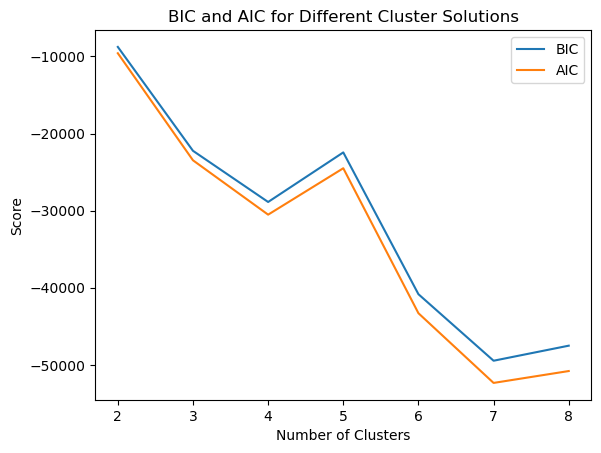

In [49]:
# MD_x is the matrix of data obtained from previous steps
n_components_range = range(2, 9)
bic_scores = []
aic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(MD_x)
    bic_scores.append(gmm.bic(MD_x))
    aic_scores.append(gmm.aic(MD_x))

# Plotting BIC and AIC values
plt.plot(n_components_range, bic_scores, label='BIC')
plt.plot(n_components_range, aic_scores, label='AIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC and AIC for Different Cluster Solutions')
plt.legend()
plt.show()

# Another attempt

# Exploring Data

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
[0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24 0.  ]
Standard deviations: [1.6 1.2 1.1 1.  0.9 0.9 0.8 0.8 0.7 0.5 0. ]
Rotation (n x k):
    convenient    spicy  fattening   greasy     fast    cheap    tasty  \
0     -3.3e-01 -2.3e-02    2.1e-01

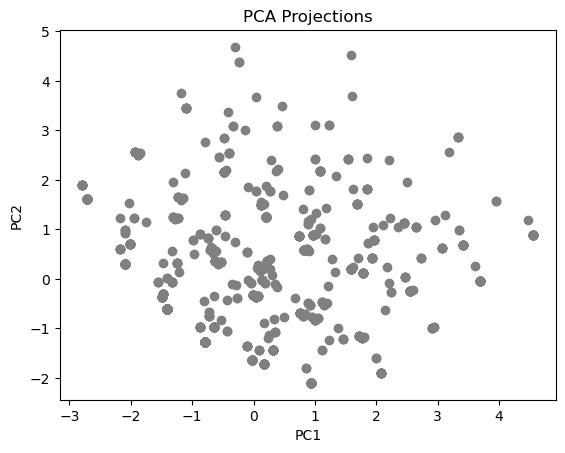

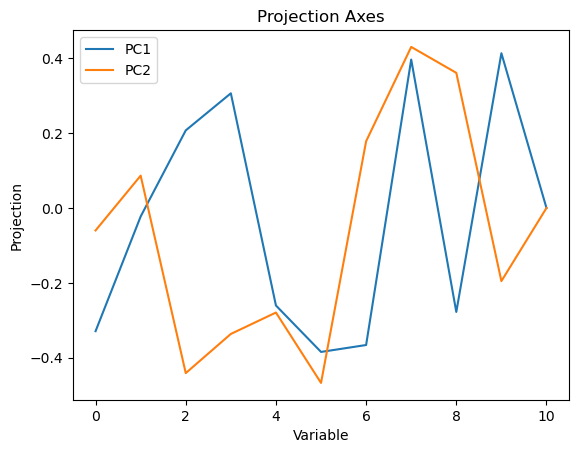

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the McDonald's dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Inspect variable names, sample size, and first three rows
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

# Extract the relevant columns for analysis
MD_x = mcdonalds.iloc[:, 1:12].values

# Convert categorical variables to binary representation
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
column_means = np.round(np.mean(MD_x, axis=0), 2)
print(column_means)

# Perform PCA
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)
pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)

# Summary of PCA results
print("Standard deviations:", np.round(np.sqrt(pca.explained_variance_), 1))
print("Rotation (n x k):")
print(pd.DataFrame(pca.components_, columns=mcdonalds.columns[1:12]))

# Plot PCA projections
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projections')
plt.show()

# Plot projection axes
plt.plot(pca.components_[0], label='PC1')
plt.plot(pca.components_[1], label='PC2')
plt.xlabel('Variable')
plt.ylabel('Projection')
plt.title('Projection Axes')
plt.legend()
plt.show()

# Extracting Segments using K-means

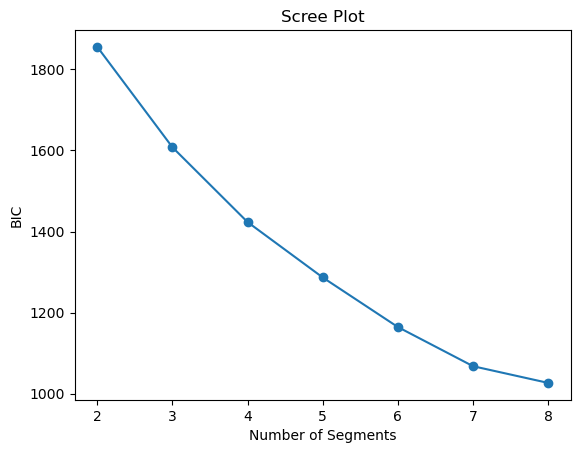

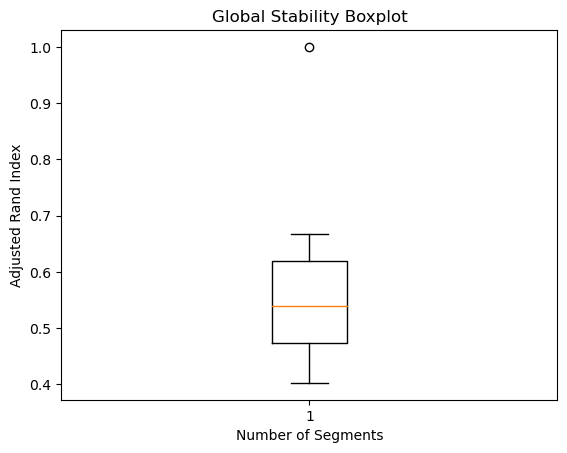

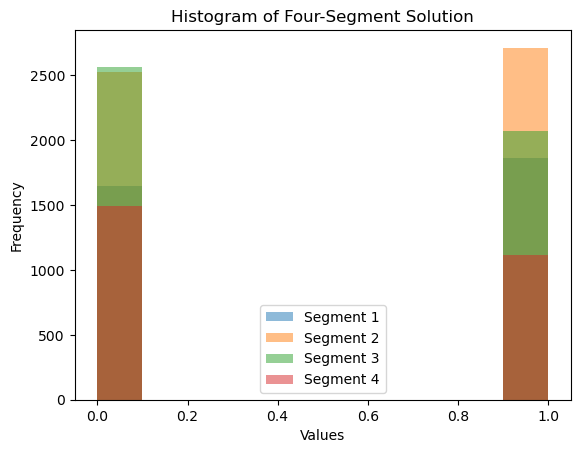

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed
np.random.seed(1234)

# Perform k-means analysis with 2 to 8 segments
k_range = range(2, 9)
bic_scores = []
ari_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    bic_scores.append(kmeans.inertia_)
    labels = kmeans.labels_
    ari = adjusted_rand_score(MD_k4, labels)
    ari_scores.append(ari)

# Plot the scree plot to compare different solutions
plt.plot(k_range, bic_scores, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("BIC")
plt.title("Scree Plot")
plt.show()

# Plot the global stability boxplot
plt.boxplot(ari_scores)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.show()

# Obtain the four-segment solution
k = 4
kmeans_4 = KMeans(n_clusters=k, n_init=10, random_state=1234)
labels_4 = kmeans_4.fit_predict(MD_x)

# Plot the gorge plot for the four-segment solution
segment_1 = MD_x[labels_4 == 0]
segment_2 = MD_x[labels_4 == 1]
segment_3 = MD_x[labels_4 == 2]
segment_4 = MD_x[labels_4 == 3]

bins = np.linspace(0, 1, 11)

plt.hist(segment_1.flatten(), bins=bins, alpha=0.5, label="Segment 1")
plt.hist(segment_2.flatten(), bins=bins, alpha=0.5, label="Segment 2")
plt.hist(segment_3.flatten(), bins=bins, alpha=0.5, label="Segment 3")
plt.hist(segment_4.flatten(), bins=bins, alpha=0.5, label="Segment 4")

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Four-Segment Solution")
plt.legend()
plt.show()


# Extracting Segments using mixtures of distributions

In [69]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Set the random seed
np.random.seed(1234)

# Perform latent class analysis with 2 to 8 segments
k_range = range(2, 9)
log_likelihoods = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', n_init=10, random_state=1234)
    gmm.fit(MD_x)
    log_likelihood = gmm.score(MD_x)
    log_likelihoods.append(log_likelihood)

# Print the log likelihoods for different segment solutions
for k, log_likelihood in zip(k_range, log_likelihoods):
    print(f"Log Likelihood for {k}-Segment Solution: {log_likelihood:.3f}")


Log Likelihood for 2-Segment Solution: 14.023
Log Likelihood for 3-Segment Solution: 18.046
Log Likelihood for 4-Segment Solution: 19.967
Log Likelihood for 5-Segment Solution: 21.395
Log Likelihood for 6-Segment Solution: 23.696
Log Likelihood for 7-Segment Solution: 24.148
Log Likelihood for 8-Segment Solution: 26.022


mixture    0    1    2    3
kmeans                     
0        191    0    0  128
1         40   51  382    3
2          0  169  174   78
3        166    0    0   71
Log Likelihood (K-means): -1423.3048830500115
Log Likelihood (GMM): 19.96672202134973


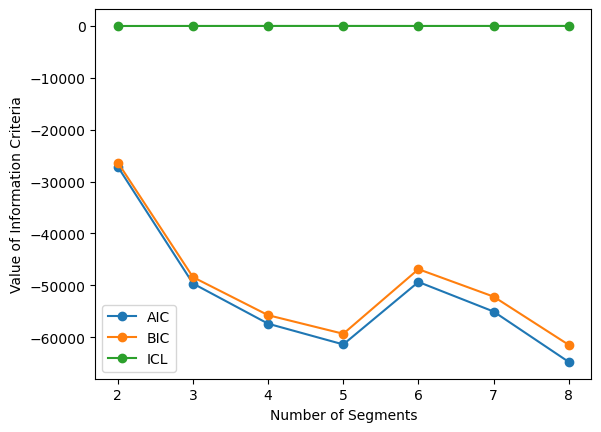

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Convert the data to a pandas DataFrame
df = pd.DataFrame(MD_x)

# Perform K-means clustering
kmeans_model = KMeans(n_clusters=4, random_state=1234).fit(df.values)
kmeans_clusters = kmeans_model.predict(df.values)

# Perform Gaussian Mixture Modeling (GMM)
gmm_model = GaussianMixture(n_components=4, random_state=1234).fit(df.values)
gmm_clusters = gmm_model.predict(df.values)

# Create contingency table
table = pd.crosstab(index=kmeans_clusters, columns=gmm_clusters, rownames=['kmeans'], colnames=['mixture'])
print(table)

# Calculate log-likelihood
loglik_kmeans = kmeans_model.score(df.values)
loglik_gmm = gmm_model.score(df.values)

print("Log Likelihood (K-means):", loglik_kmeans)
print("Log Likelihood (GMM):", loglik_gmm)

# Plot the information criteria
aic_scores = []
bic_scores = []
icl_scores = []

for k in range(2, 9):
    gmm_model = GaussianMixture(n_components=k, random_state=1234).fit(df.values)
    aic_scores.append(gmm_model.aic(df.values))
    bic_scores.append(gmm_model.bic(df.values))
    icl_scores.append(gmm_model.score(df.values))

plt.plot(range(2, 9), aic_scores, marker='o', label='AIC')
plt.plot(range(2, 9), bic_scores, marker='o', label='BIC')
plt.plot(range(2, 9), icl_scores, marker='o', label='ICL')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.show()
